In [118]:
# Let us first read the data from the file
import pandas as pd
data = pd.read_csv(r'C:\Users\tenu0.LABRINTH\DataspellProjects\DS-Lab\Algorithms\Datasets\00-fruits.csv')
data

,Weight,Colour,Label
0,303,3,Banana
1,370,1,Apple
2,298,3,Banana
3,277,3,Banana
4,377,4,Apple
5,299,3,Banana
6,382,1,Apple
7,374,4,Apple
8,303,4,Banana
9,309,3,Banana


In [119]:
def fruitLabels(s):
    s = s.strip().lower()
    if s == "apple":
        return "A"
    if s == "banana":
        return "B"
    return "X"
import pandas as pd
data = pd.read_csv(r"C:\Users\tenu0.LABRINTH\DataspellProjects\DS-Lab\Algorithms\Datasets\00-fruits.csv", converters={"Label":fruitLabels})
data

,Weight,Colour,Label
0,303,3,B
1,370,1,A
2,298,3,B
3,277,3,B
4,377,4,A
5,299,3,B
6,382,1,A
7,374,4,A
8,303,4,B
9,309,3,B


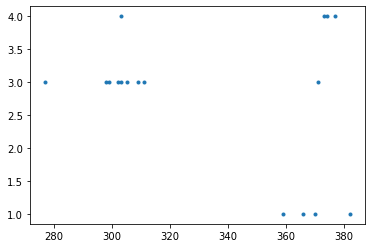

In [120]:
import matplotlib.pyplot as plt
plt.plot(data.Weight, data.Colour, ".")
plt.show()

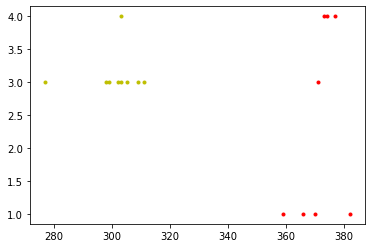

In [121]:
apples = data[data.Label == "A"]
bananas = data[data.Label == "B"]
plt.plot(apples.Weight, apples.Colour, "r.")
plt.plot(bananas.Weight, bananas.Colour, "y.")
plt.show()

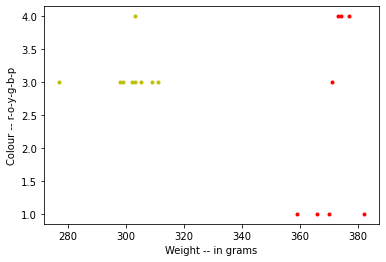

In [122]:
plt.plot(apples.Weight, apples.Colour, "r.")
plt.plot(bananas.Weight, bananas.Colour, "y.")
plt.xlabel("Weight -- in grams")
plt.ylabel("Colour -- r-o-y-g-b-p")
plt.show()

**Exercise 1** :: Change the points for Apples to big circles and the points for Bananas to crosses. Edit the areas marked with ??? in the code below.

**Exercise 2** :: Add a legend

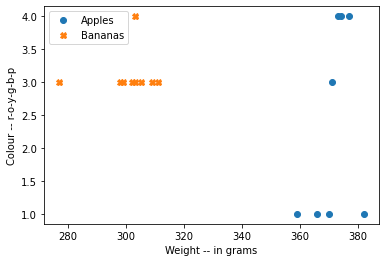

In [123]:
#Exercise1&2
plt.plot(apples.Weight, apples.Colour, "o")
plt.plot(bananas.Weight, bananas.Colour, "X")
plt.xlabel("Weight -- in grams")
plt.ylabel("Colour -- r-o-y-g-b-p")
plt.legend(["Apples","Bananas"])
plt.show()

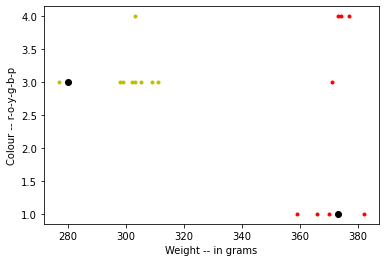

In [124]:
plt.plot(apples.Weight, apples.Colour, "r.")
plt.plot(bananas.Weight, bananas.Colour, "y.")
plt.xlabel("Weight -- in grams")
plt.ylabel("Colour -- r-o-y-g-b-p")
plt.plot([373, 280], [1, 3], "ko")
plt.show()

In [125]:
import math
def dist(a, b):
    sqSum = 0
    for i in range(len(a)):
        sqSum += (a[i] - b[i]) ** 2
    return math.sqrt(sqSum)

In [126]:
f0 = data.values[0]
print(f0)
f1 = data.values[1]
print(f1)

[303 3 'B']
[370 1 'A']


In [127]:
dist(f1[:2], f0[:2])

67.02984409947557

In [128]:
f2 = data.values[2]
dist(f2[:2], f0[:2])

5.0

**Exercise 3** :: Find the distance between the fruits in line 2, and line 1


In [129]:
##Let us calculate the distance between f1 and f2
dist(f2[:2], f1[:2])

72.02777242147643

find distance for all

In [130]:
test_pt = [286, 366, 271, 334, 303, 330, 243, 389, 357, 299]
distances = []
for t in data.values:

    distances.append(dist(t[:1],test_pt))

distances.sort()
distances

[9.0,
 12.0,
 13.0,
 16.0,
 17.0,
 17.0,
 19.0,
 23.0,
 25.0,
 73.0,
 80.0,
 84.0,
 85.0,
 87.0,
 88.0,
 91.0,
 96.0]

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data - 75% train, 25% test
X= data.drop('Label', axis=1)
y = data.Label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Scale the X data

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [132]:
def knn_predict(X_train, X_test, y_train, y_test, k):

    from collections import Counter
    y_hat_test = []

    for test_point in X_test:
        distances = []

        for train_point in X_train:
            distance = dist(test_point, train_point)
            distances.append(distance)

        df_dists = pd.DataFrame(data=distances, columns=['dist'],
                                index=y_train.index)


        df_nn = df_dists.sort_values(by=['dist'], axis=0)[:k]

        counter = Counter(y_train[df_nn.index])

        prediction = counter.most_common()[0][0]

        y_hat_test.append(prediction)

    return y_hat_test

y_hat_test = knn_predict(X_train, X_test, y_train, y_test, k=5)

print(y_hat_test)

['B', 'B', 'A', 'B', 'A']


In [133]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_hat_test))

1.0


In [134]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5, p=1)
clf.fit(X_train, y_train)
y_pred_test = clf.predict(X_test)

print(f"Sklearn KNN Accuracy: {accuracy_score(y_test, y_pred_test)}")

Sklearn KNN Accuracy: 1.0


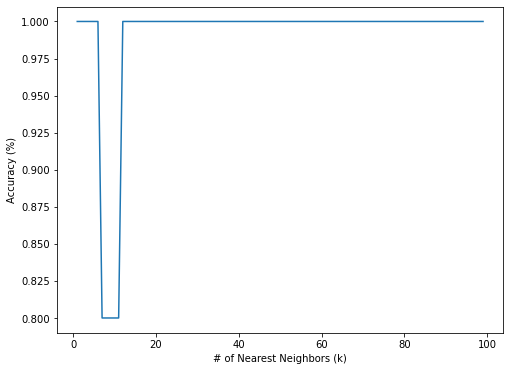

In [135]:
accuracies = []

for k in range(1,100):
    y_hat_test = knn_predict(X_train, X_test, y_train, y_test, k)
    accuracies.append(accuracy_score(y_test, y_hat_test))

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1,100), accuracies)
ax.set_xlabel('# of Nearest Neighbors (k)')
ax.set_ylabel('Accuracy (%)');